# Student Grade Analysis & Prediction
Objective: Prediction of the final grade of Portugese high school students

Data Set Information The data used is from a Portuguese secondary school. The data includes academic and personal characteristics of the students as well as final grades. The task is to predict the final grade from the student information. 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# The Data
Let's start by reading in the student-mat.csv file into a pandas dataframe.

In [2]:
data=pd.read_csv("student-mat.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
print('Total number of students:',len(data))

Total number of students: 395


In [4]:
data.head()      # First 5 values of dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data.tail()      # Last 5 values of dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
data.isna().sum()          # To check any null values present in dataset

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# final grade

In [8]:
#EDA

In [9]:
data["G3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

# understand data by visualization

<AxesSubplot:>

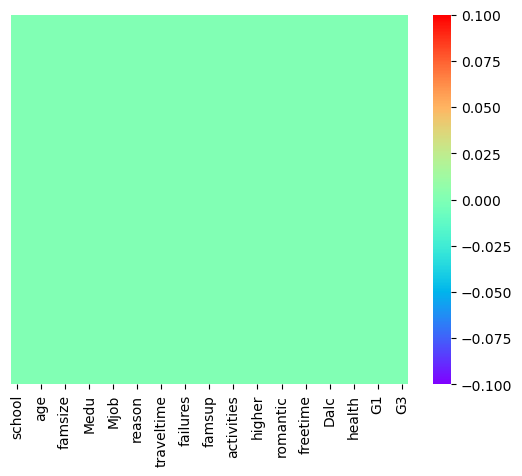

In [10]:
sns.heatmap(data.isnull(),cmap="rainbow",yticklabels=False)    # To check any null values present in dataset pictorially


<AxesSubplot:>

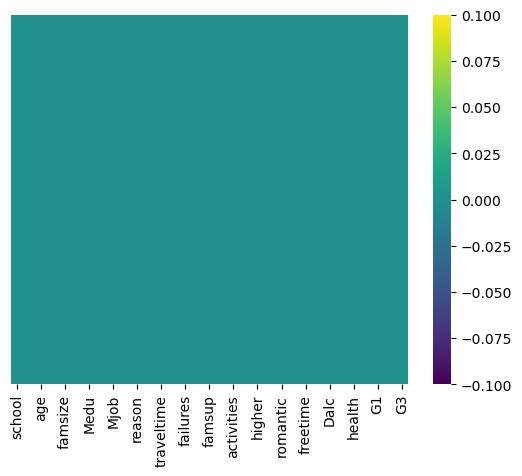

In [11]:
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False)    # Map color - viridis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


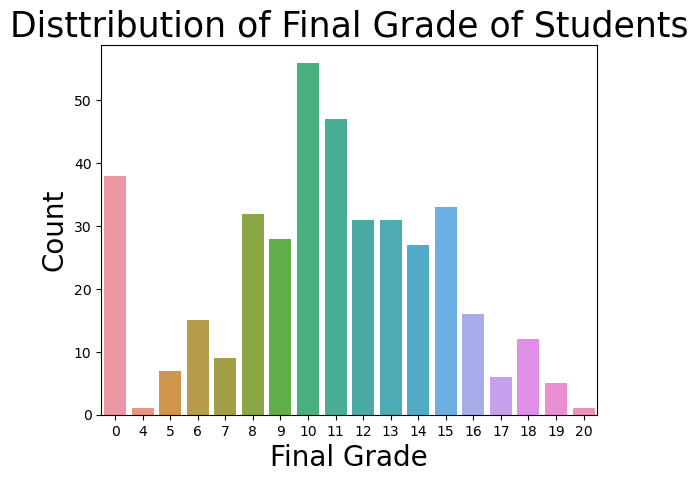

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
b=sns.countplot(data["G3"])
b.axes.set_title("Disttribution of Final Grade of Students",fontsize=25)
b.set_xlabel("Final Grade",fontsize=20)
b.set_ylabel("Count",fontsize=20)
plt.show()

In [13]:
data.shape

(395, 33)

# Student's Sex

In [14]:
#total male 
#total female
male_student=len(data[data["sex"]=="M"])
female_student=len(data[data["sex"]=="F"])
print("Number of male students:",male_student)
print("Number of male students:",female_student)

Number of male students: 187
Number of male students: 208


<AxesSubplot:xlabel='sex', ylabel='count'>

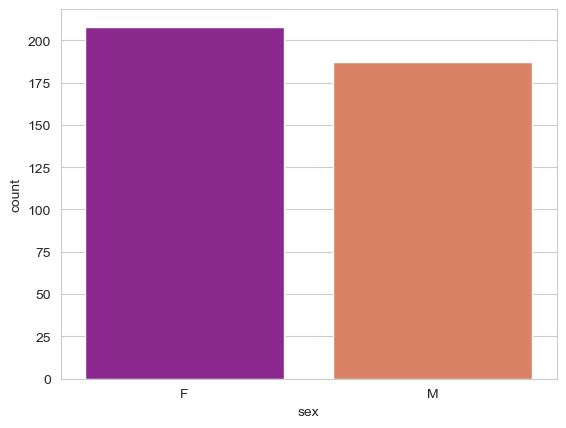

In [15]:
sns.set_style('whitegrid')    # male & female student representaion on countplot
sns.countplot(x='sex',data=data,palette='plasma')

# Age of Students

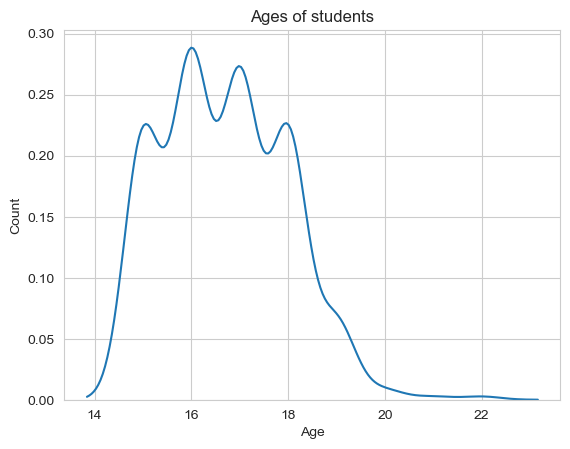

In [17]:
b = sns.kdeplot(data['age'])    # Kernel Density Estimations
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

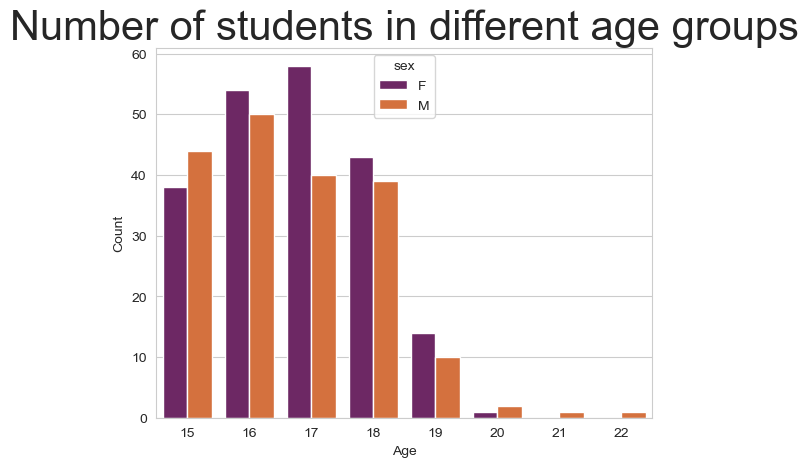

In [18]:
b=sns.countplot(x="age",hue="sex",data=data,palette='inferno')
b.axes.set_title("Number of students in different age groups",fontsize=30)
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

# Students from Urban & Rural Areas

In [21]:
u_student = len(data[data['address'] == 'U'])    # Number of urban areas students
print('Number of Urban students:',u_student)
r_student = len(data[data['address'] == 'R'])    # Number of rural areas students
print('Number of Rural students:',r_student)

Number of Urban students: 307
Number of Rural students: 88


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


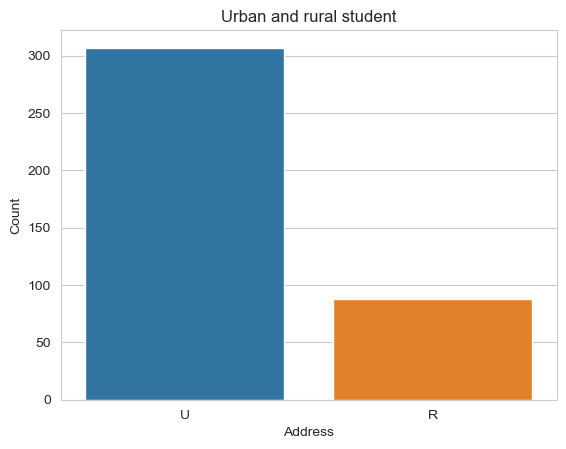

In [22]:
b=sns.countplot(data["address"])
b.axes.set_title("Urban and rural student")
b.set_xlabel("Address")
b.set_ylabel("Count")
plt.show()

<AxesSubplot:xlabel='address', ylabel='count'>

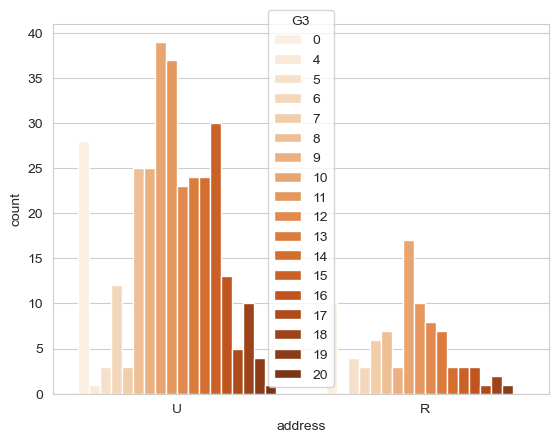

In [23]:
sns.countplot(x='address',hue='G3',data=data,palette='Oranges')

In [24]:
data.corr()["G3"].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

from the data above lets create one more column to get the average grade from G1 to G3 (3years average):

# Encoding categorical variables using LabelEncoder()

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.iloc[:,0]=le.fit_transform(data.iloc[:,0])
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,4]=le.fit_transform(data.iloc[:,4])
data.iloc[:,5]=le.fit_transform(data.iloc[:,5])
data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
data.iloc[:,9]=le.fit_transform(data.iloc[:,9])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])
data.iloc[:,11]=le.fit_transform(data.iloc[:,11])
data.iloc[:,15]=le.fit_transform(data.iloc[:,15])
data.iloc[:,16]=le.fit_transform(data.iloc[:,16])
data.iloc[:,17]=le.fit_transform(data.iloc[:,17])
data.iloc[:,18]=le.fit_transform(data.iloc[:,18])
data.iloc[:,19]=le.fit_transform(data.iloc[:,19])
data.iloc[:,20]=le.fit_transform(data.iloc[:,20])
data.iloc[:,21]=le.fit_transform(data.iloc[:,21])
data.iloc[:,22]=le.fit_transform(data.iloc[:,22])


In [26]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [27]:
# drop the school and grade columns
data = data.drop(['school', 'G1', 'G2'], axis='columns')

In [28]:
# Find correlations with the Grade
most_correlated = data.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3          1.000000
failures    0.360415
Medu        0.217147
higher      0.182465
age         0.161579
Fedu        0.152457
goout       0.132791
romantic    0.129970
reason      0.121994
Name: G3, dtype: float64

In [29]:
data = data.loc[:, most_correlated.index]
data.head()

,G3,failures,Medu,higher,age,Fedu,goout,romantic,reason
0,6,0,4,1,18,4,4,0,0
1,6,0,1,1,17,1,3,0,0
2,10,3,1,1,15,1,2,0,2
3,15,0,4,1,15,2,2,1,1
4,10,0,3,1,16,3,2,0,1


# Failure Attribute

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Previous Failures vs Final Grade(G3)')

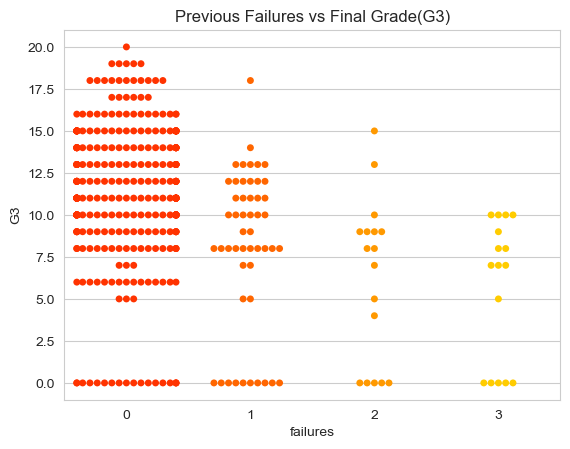

In [31]:
b = sns.swarmplot(x=data['failures'],y=data['G3'],palette='autumn')
b.axes.set_title('Previous Failures vs Final Grade(G3)')

# Family Education Attribute ( Fedu + Medu )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points can

Text(0.5, 1.0, 'Family Education vs Final Grade(G3)')

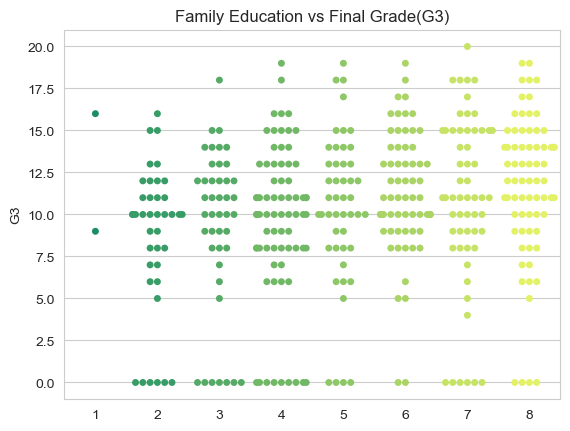

In [32]:
fa_edu = data['Fedu'] + data['Medu']
b = sns.swarmplot(x=fa_edu,y=data['G3'],palette='summer')
b.axes.set_title('Family Education vs Final Grade(G3)')

# Machine Learning Algorithms

In [33]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [34]:
# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [36]:
# splitting the data into training and testing data (70% and 30%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(data, data['G3'], test_size = 0.30, random_state=42)

In [38]:
X_train.head()

,G3,failures,Medu,higher,age,Fedu,goout,romantic,reason
17,10,0,3,1,16,3,2,0,3
165,12,1,3,0,16,2,2,0,0
24,8,0,2,1,15,4,2,0,0
126,11,0,3,1,15,4,2,1,1
346,16,0,4,1,18,3,2,1,0


# MAE - Mean Absolute Error & RMSE - Root Mean Square Error

In [39]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [40]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [41]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7227
Median Baseline RMSE: 4.7377


In [45]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [46]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,3.399168,4.377955
Random Forest,3.602406,4.541327
Extra Trees,3.804734,4.770654
SVM,3.473173,4.500913
Gradient Boosted,3.492025,4.406455
Baseline,3.722689,4.737655


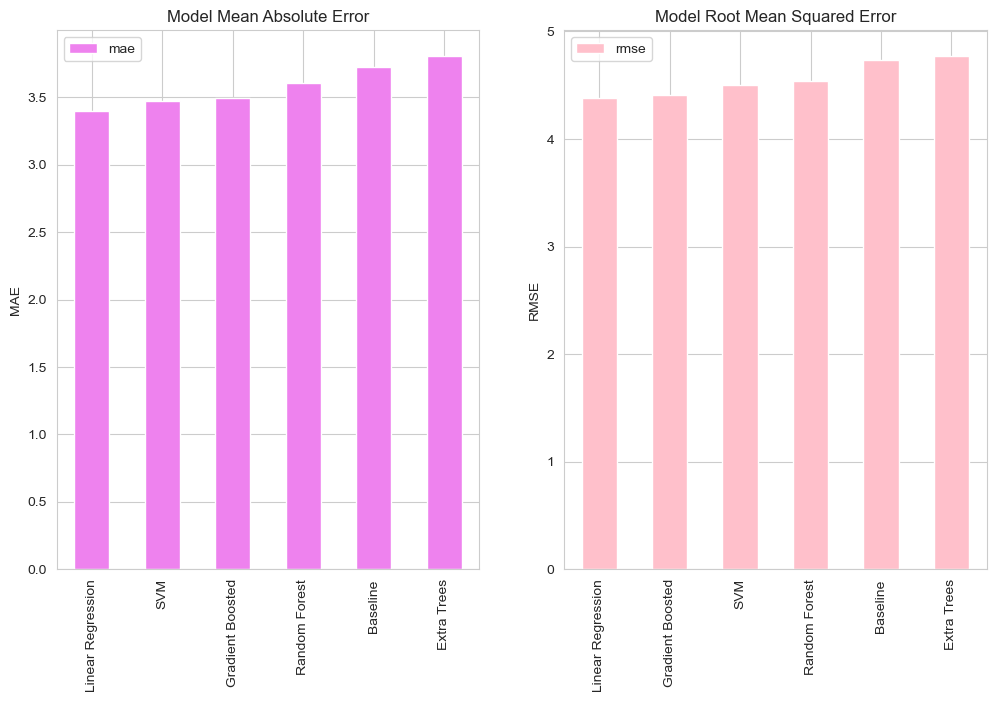

In [47]:
plt.figure(figsize=(12, 7))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'violet', ax = ax)
plt.title('Model Mean Absolute Error') 
plt.ylabel('MAE')

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'pink', ax = ax)
plt.title('Model Root Mean Squared Error') 
plt.ylabel('RMSE')

plt.show()


# Conclusion: As we see both Model Mean Absolute Error & Model Root Mean Squared Error that the linear regression is performing the best in both cases